In [1]:
import pandas as pd
df=pd.read_csv('StudentPerformanceFactors.csv')

In [2]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

In [5]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# ordinal categorical variables
le = LabelEncoder()
df['Parental_Education_Level'] = le.fit_transform(df['Parental_Education_Level'])
df['Parental_Involvement'] = le.fit_transform(df['Parental_Involvement'])
df['Access_to_Resources'] = le.fit_transform(df['Access_to_Resources'])
df['Motivation_Level'] = le.fit_transform(df['Motivation_Level'])
df['Family_Income'] = le.fit_transform(df['Family_Income'])
df['Teacher_Quality'] = le.fit_transform(df['Teacher_Quality'])
df['Distance_from_Home'] = le.fit_transform(df['Distance_from_Home'])
df['Peer_Influence'] = le.fit_transform(df['Peer_Influence'])

# List of nominal categorical variables
nominal_vars = ['Gender', 'School_Type', 'Internet_Access', 'Learning_Disabilities','Extracurricular_Activities']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=nominal_vars, drop_first=True).astype(int)


In [6]:
# Calculate proportion of each gender
gender_proportion = df['Gender'].value_counts(normalize=True)

print(gender_proportion)

Gender
Male      0.577267
Female    0.422733
Name: proportion, dtype: float64


In [7]:
# Calculate proportion of each school type
school_type_proportion = df['School_Type'].value_counts(normalize=True)

# Display the proportions
print(school_type_proportion)

School_Type
Public     0.695929
Private    0.304071
Name: proportion, dtype: float64


In [8]:
Internet_Access_proportion = df['Internet_Access'].value_counts(normalize=True)
print(Internet_Access_proportion)

Internet_Access
Yes    0.924474
No     0.075526
Name: proportion, dtype: float64


In [9]:
Learning_Disabilities_proportion = df['Learning_Disabilities'].value_counts(normalize=True)
print(Learning_Disabilities_proportion)

Learning_Disabilities
No     0.894809
Yes    0.105191
Name: proportion, dtype: float64


In [10]:
Family_Income_proportion = df['Family_Income'].value_counts(normalize=True)
print(Family_Income_proportion)

Family_Income
Low       0.404420
Medium    0.403511
High      0.192069
Name: proportion, dtype: float64


In [10]:
Distance_from_Home_proportion = df['Distance_from_Home'].value_counts(normalize=True)
print(Distance_from_Home_proportion)

Distance_from_Home
Near        0.598002
Moderate    0.302407
Far         0.099591
Name: proportion, dtype: float64


In [11]:
# Numerical variables
numerical_vars = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Tutoring_Sessions', 'Exam_Score', 'Physical_Activity'
]

# Categorical variables
categorical_vars = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions   Exam_Score  Physical_Activity  
count        6607.000000  6607.000000        6607.000000  
mean            1.493719    67.235659           2.967610  
std             1.230570     3.890456           1.031231  
min             0.000000    55.000000           0.000000  
25%             1.000000    65.000000           2.000000  
50%             1.000000    67.000000     

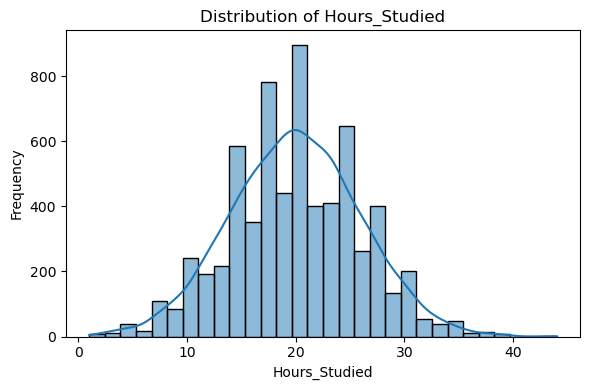

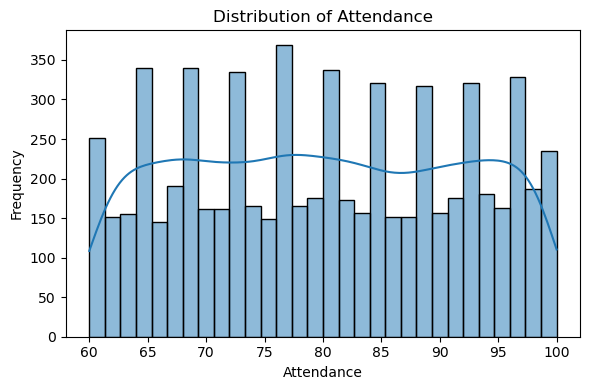

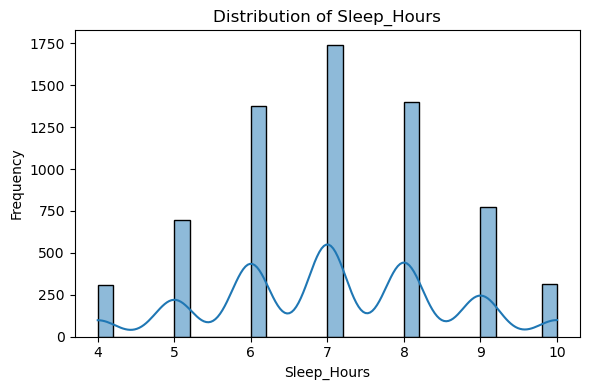

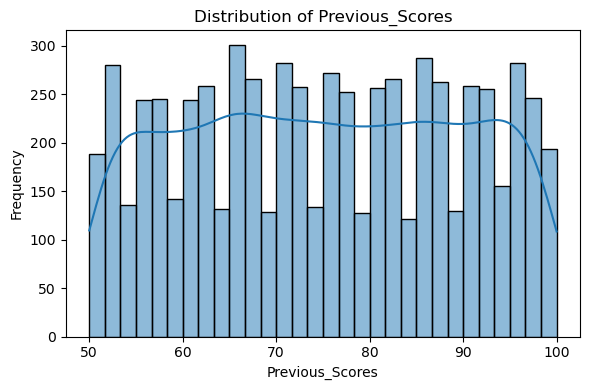

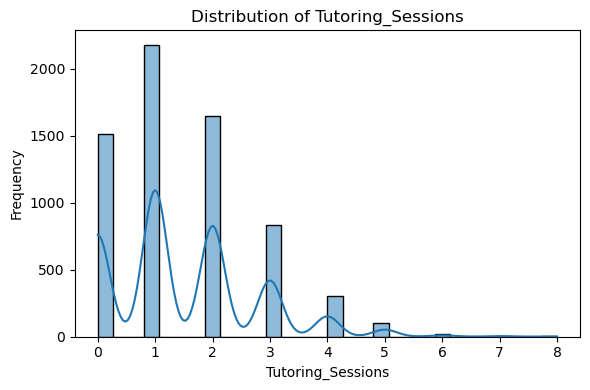

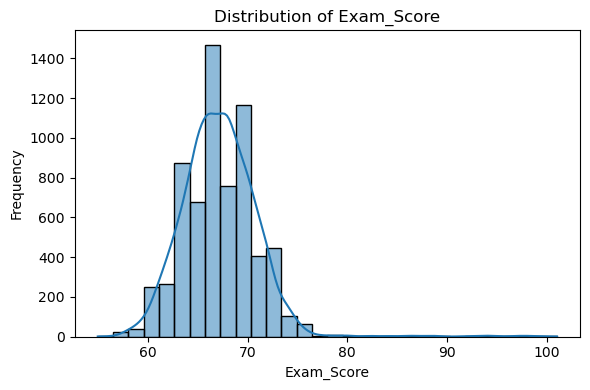

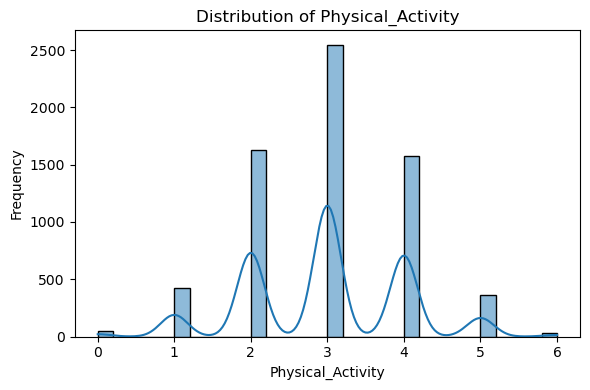

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df[numerical_vars].describe())

# Histograms
for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

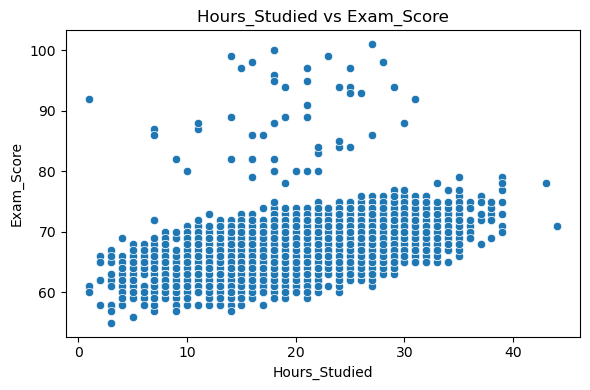

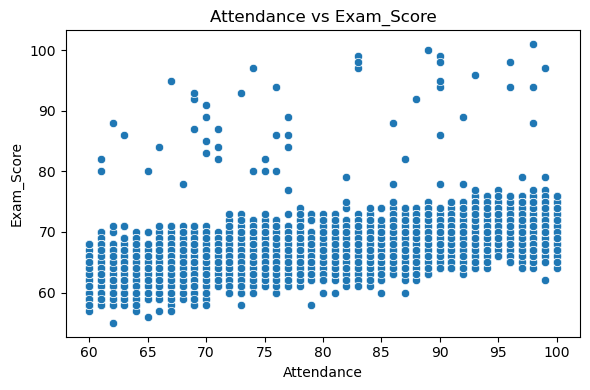

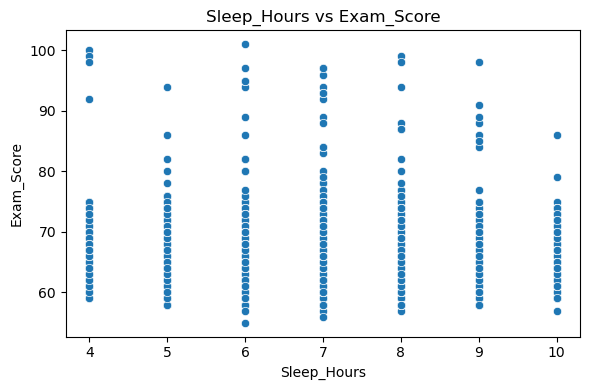

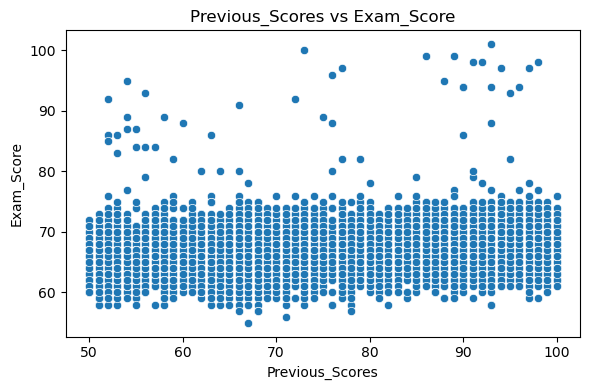

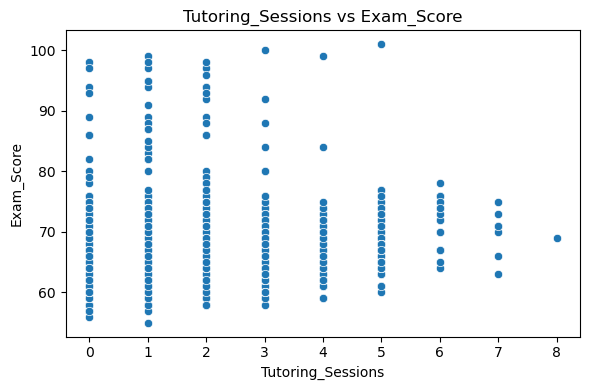

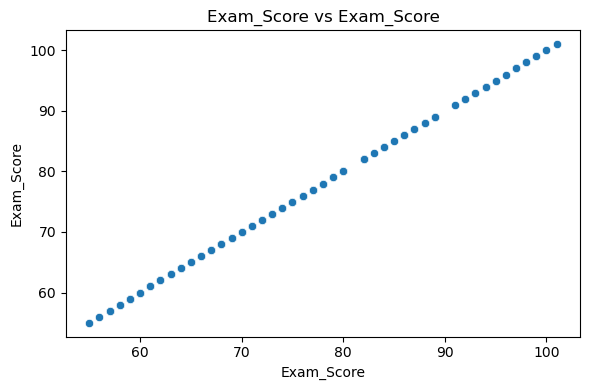

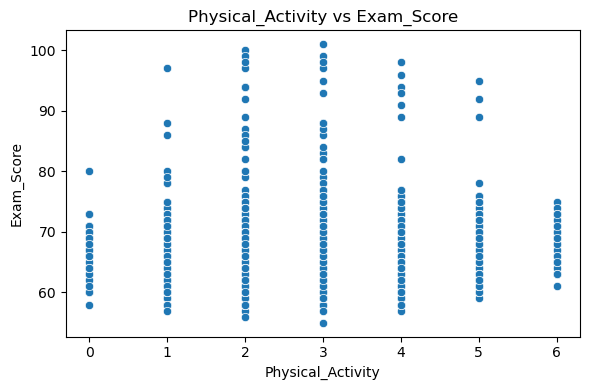

In [14]:
for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=var, y="Exam_Score", data=df)
    plt.title(f"{var} vs Exam_Score")
    plt.xlabel(var)
    plt.ylabel("Exam_Score")
    plt.tight_layout()
    plt.show()

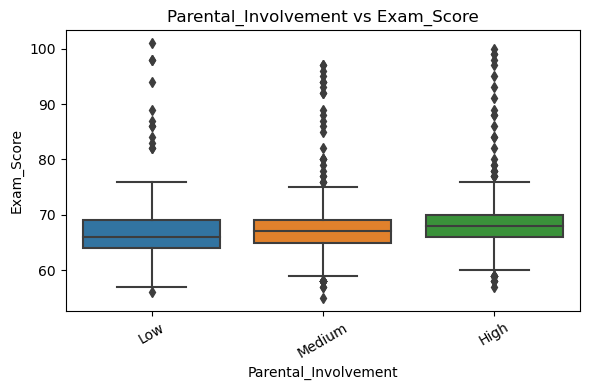

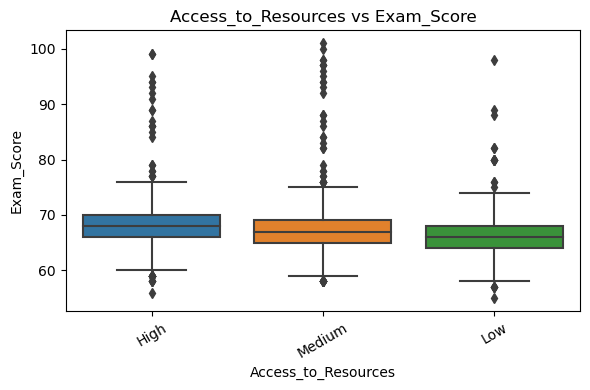

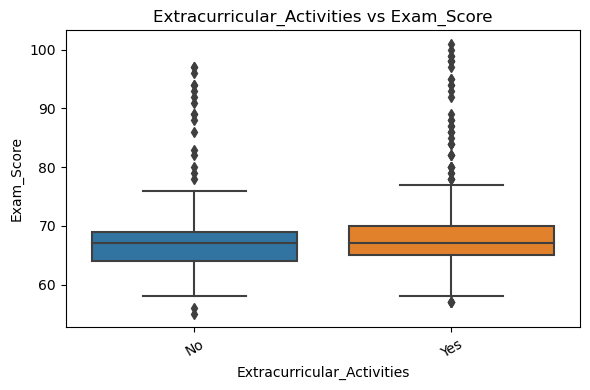

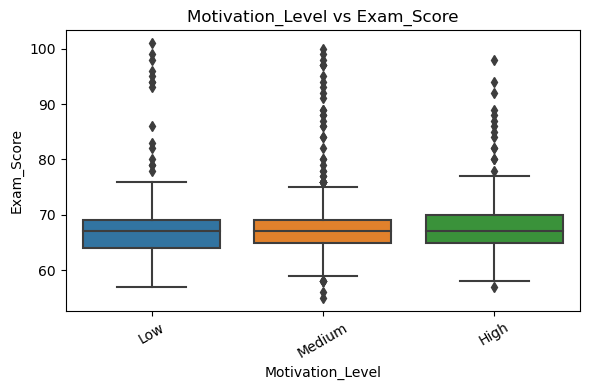

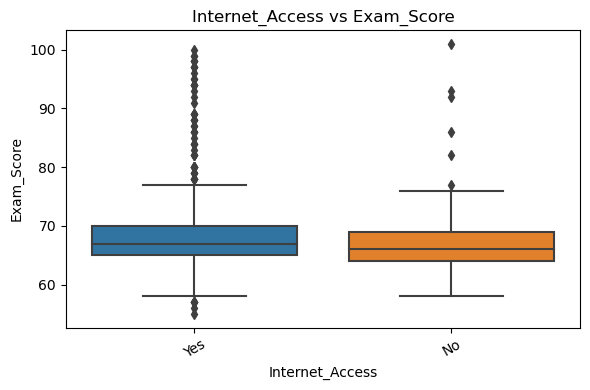

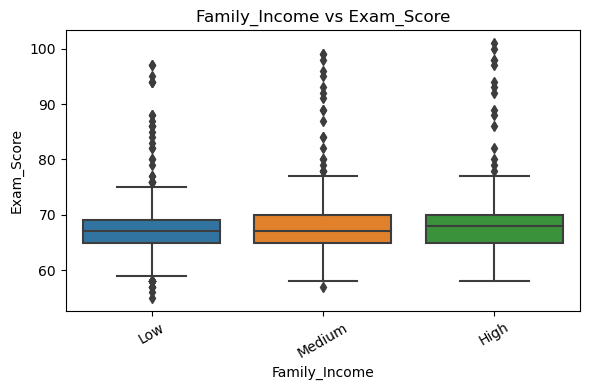

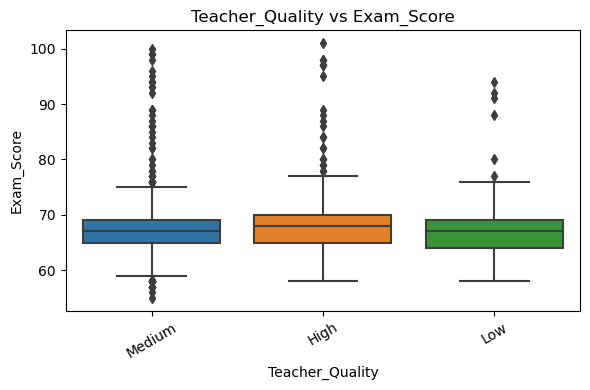

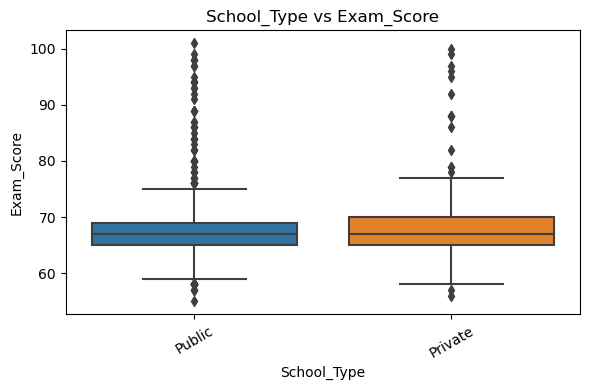

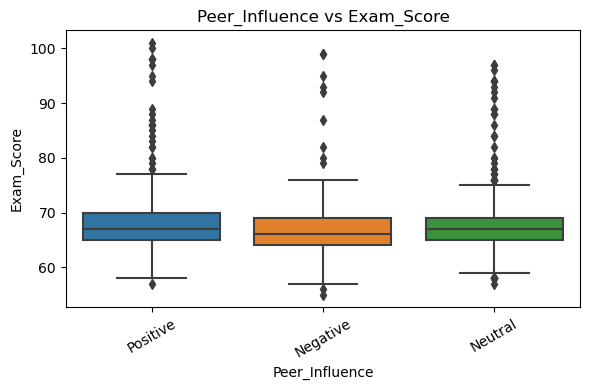

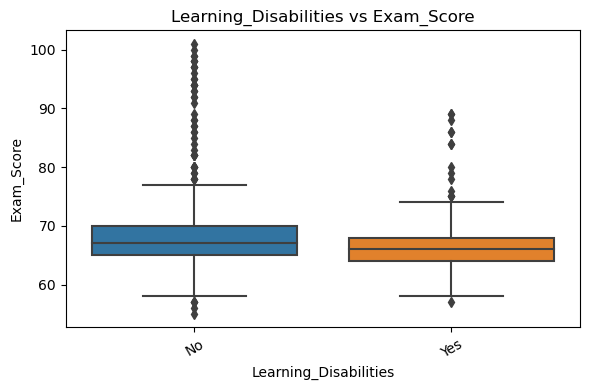

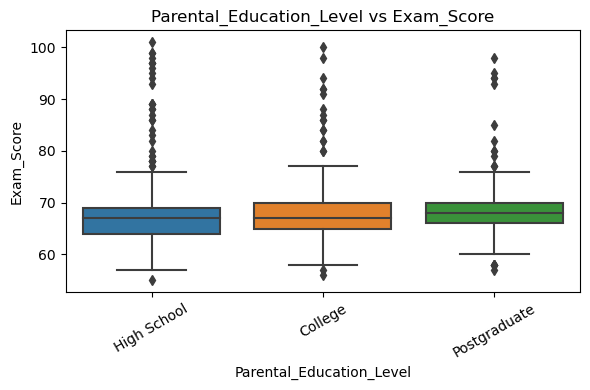

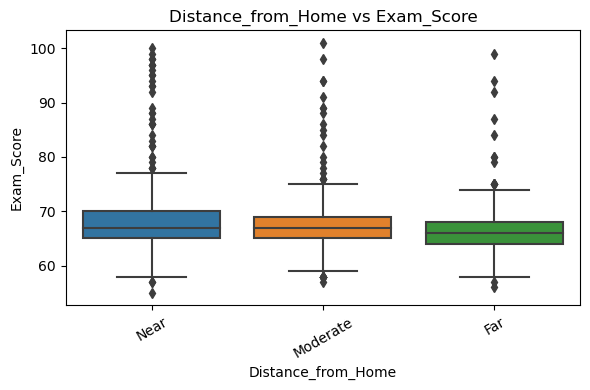

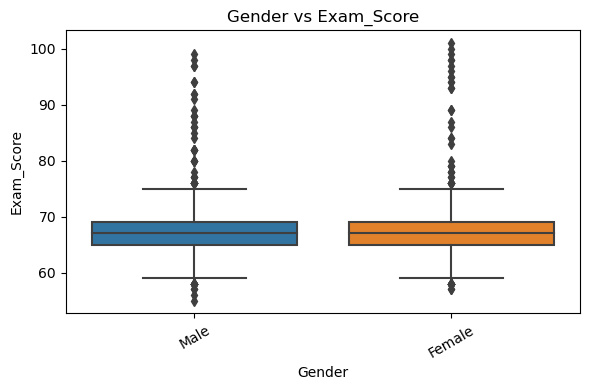

In [11]:
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y="Exam_Score", data=df)
    plt.title(f"{var} vs Exam_Score")
    plt.xlabel(var)
    plt.ylabel("Exam_Score")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

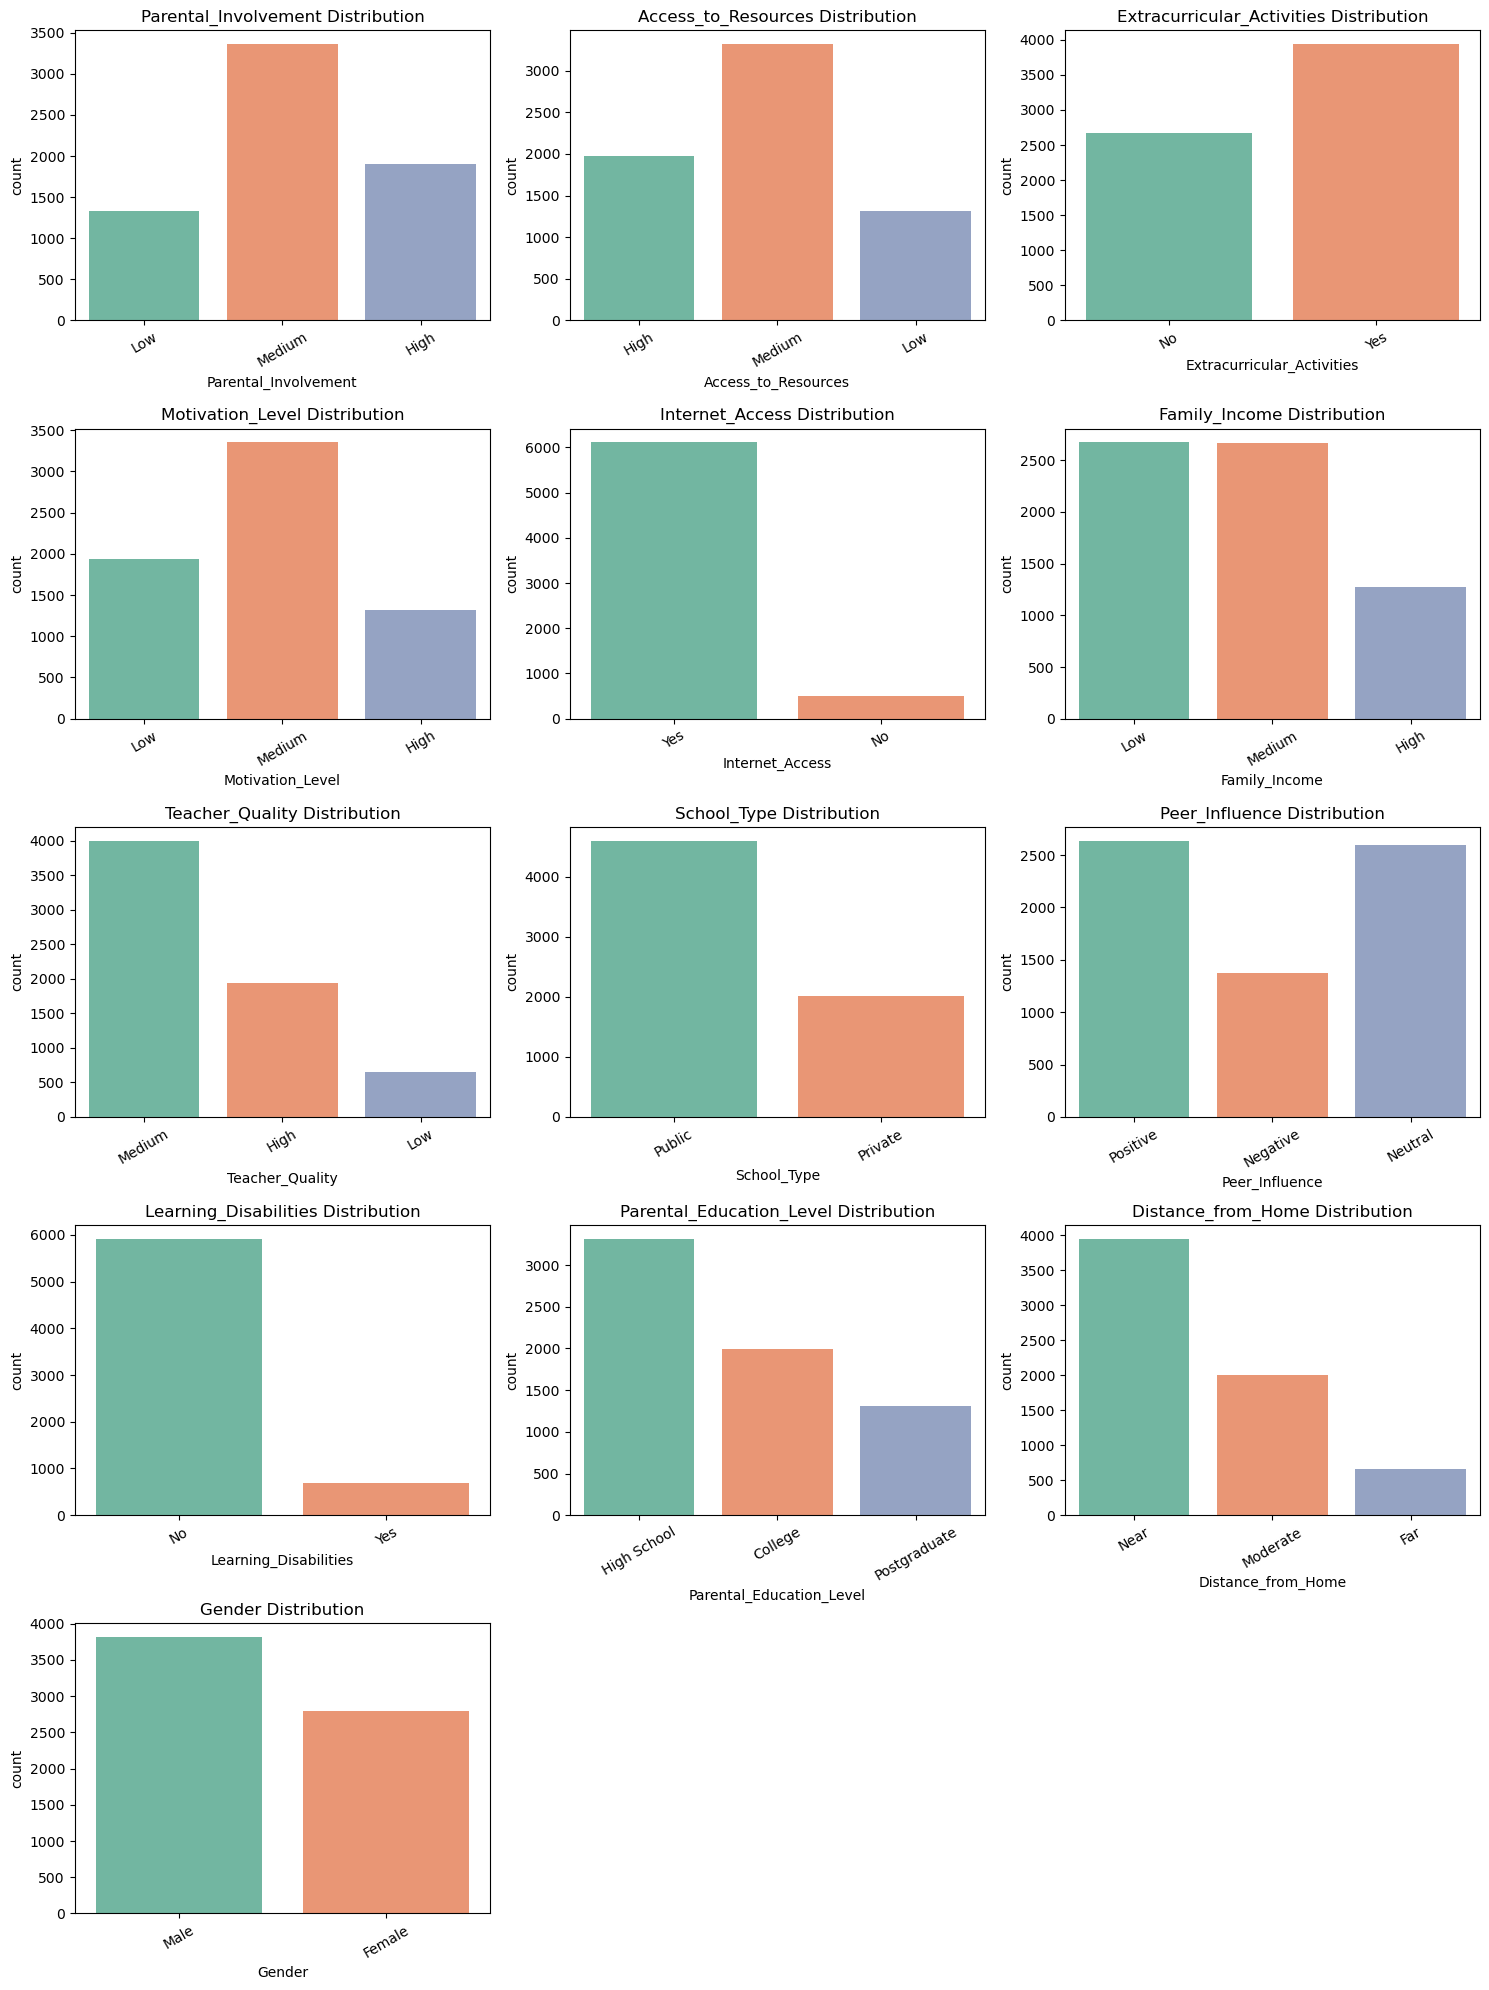

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]

# Plot settings
n_cols = 3  # number of columns in subplot grid
n_rows = -(-len(categorical_vars) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # make it iterable

# Generate subplots
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{var} Distribution")
    axes[i].tick_params(axis='x', rotation=30)

# Remove unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



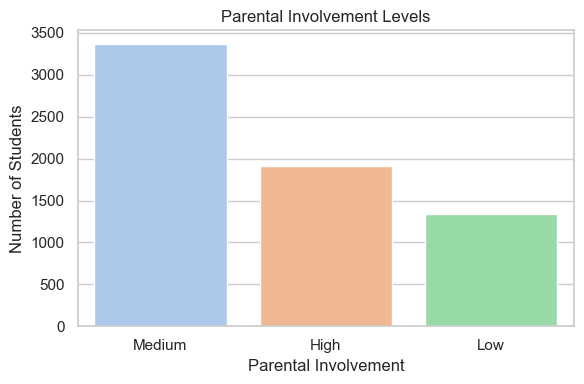

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Bar chart for Parental_Involvement
plt.figure(figsize=(6, 4))
sns.countplot(x='Parental_Involvement', data=df, order=df['Parental_Involvement'].value_counts().index, palette='pastel')
plt.title('Parental Involvement Levels')
plt.xlabel('Parental Involvement')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


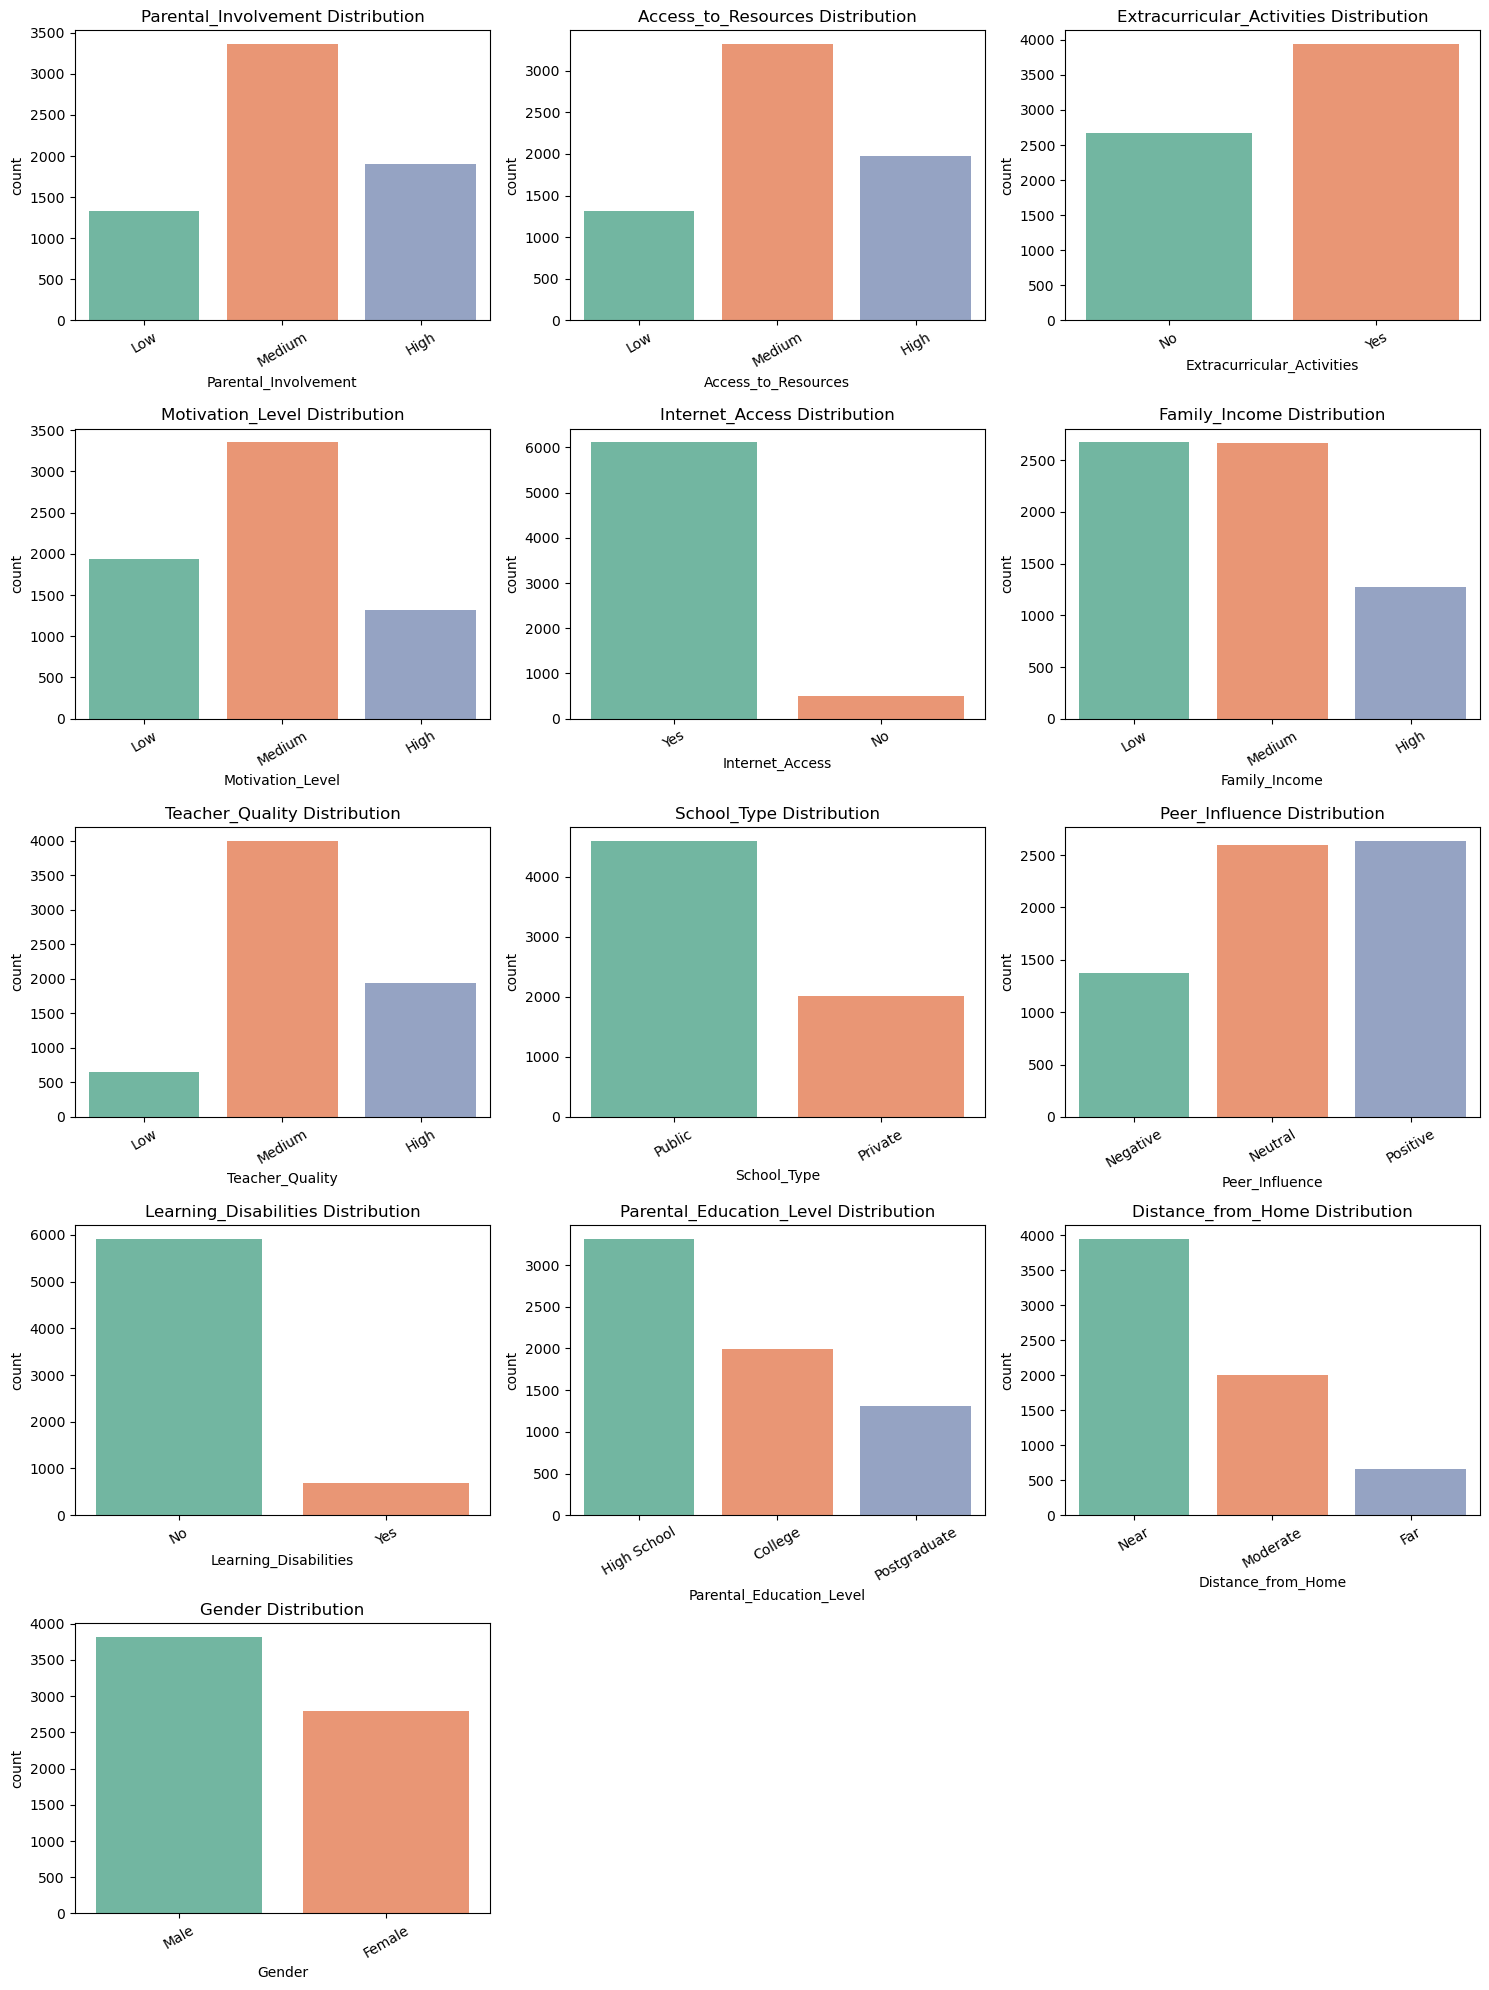

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order for ordinal variables
ordinal_orders = {
    "Parental_Involvement": ["Low", "Medium", "High"],
    "Access_to_Resources": ["Low", "Medium", "High"],
    "Motivation_Level": ["Low", "Medium", "High"],
    "Family_Income": ["Low", "Medium", "High"],
    "Teacher_Quality": ["Low", "Medium", "High"],
    "Peer_Influence": ["Negative", "Neutral", "Positive"],
    "Parental_Education_Level": ["High School", "College", "Postgraduate"],
    "Distance_from_Home": ["Near", "Moderate", "Far"]
}

# List of categorical variables
categorical_vars = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]

# Plot settings
n_cols = 3  # number of columns in subplot grid
n_rows = -(-len(categorical_vars) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Generate subplots
for i, var in enumerate(categorical_vars):
    order = ordinal_orders.get(var, None)  # get custom order if defined
    sns.countplot(x=var, data=df, ax=axes[i], palette="Set2", order=order)
    axes[i].set_title(f"{var} Distribution")
    axes[i].tick_params(axis='x', rotation=30)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


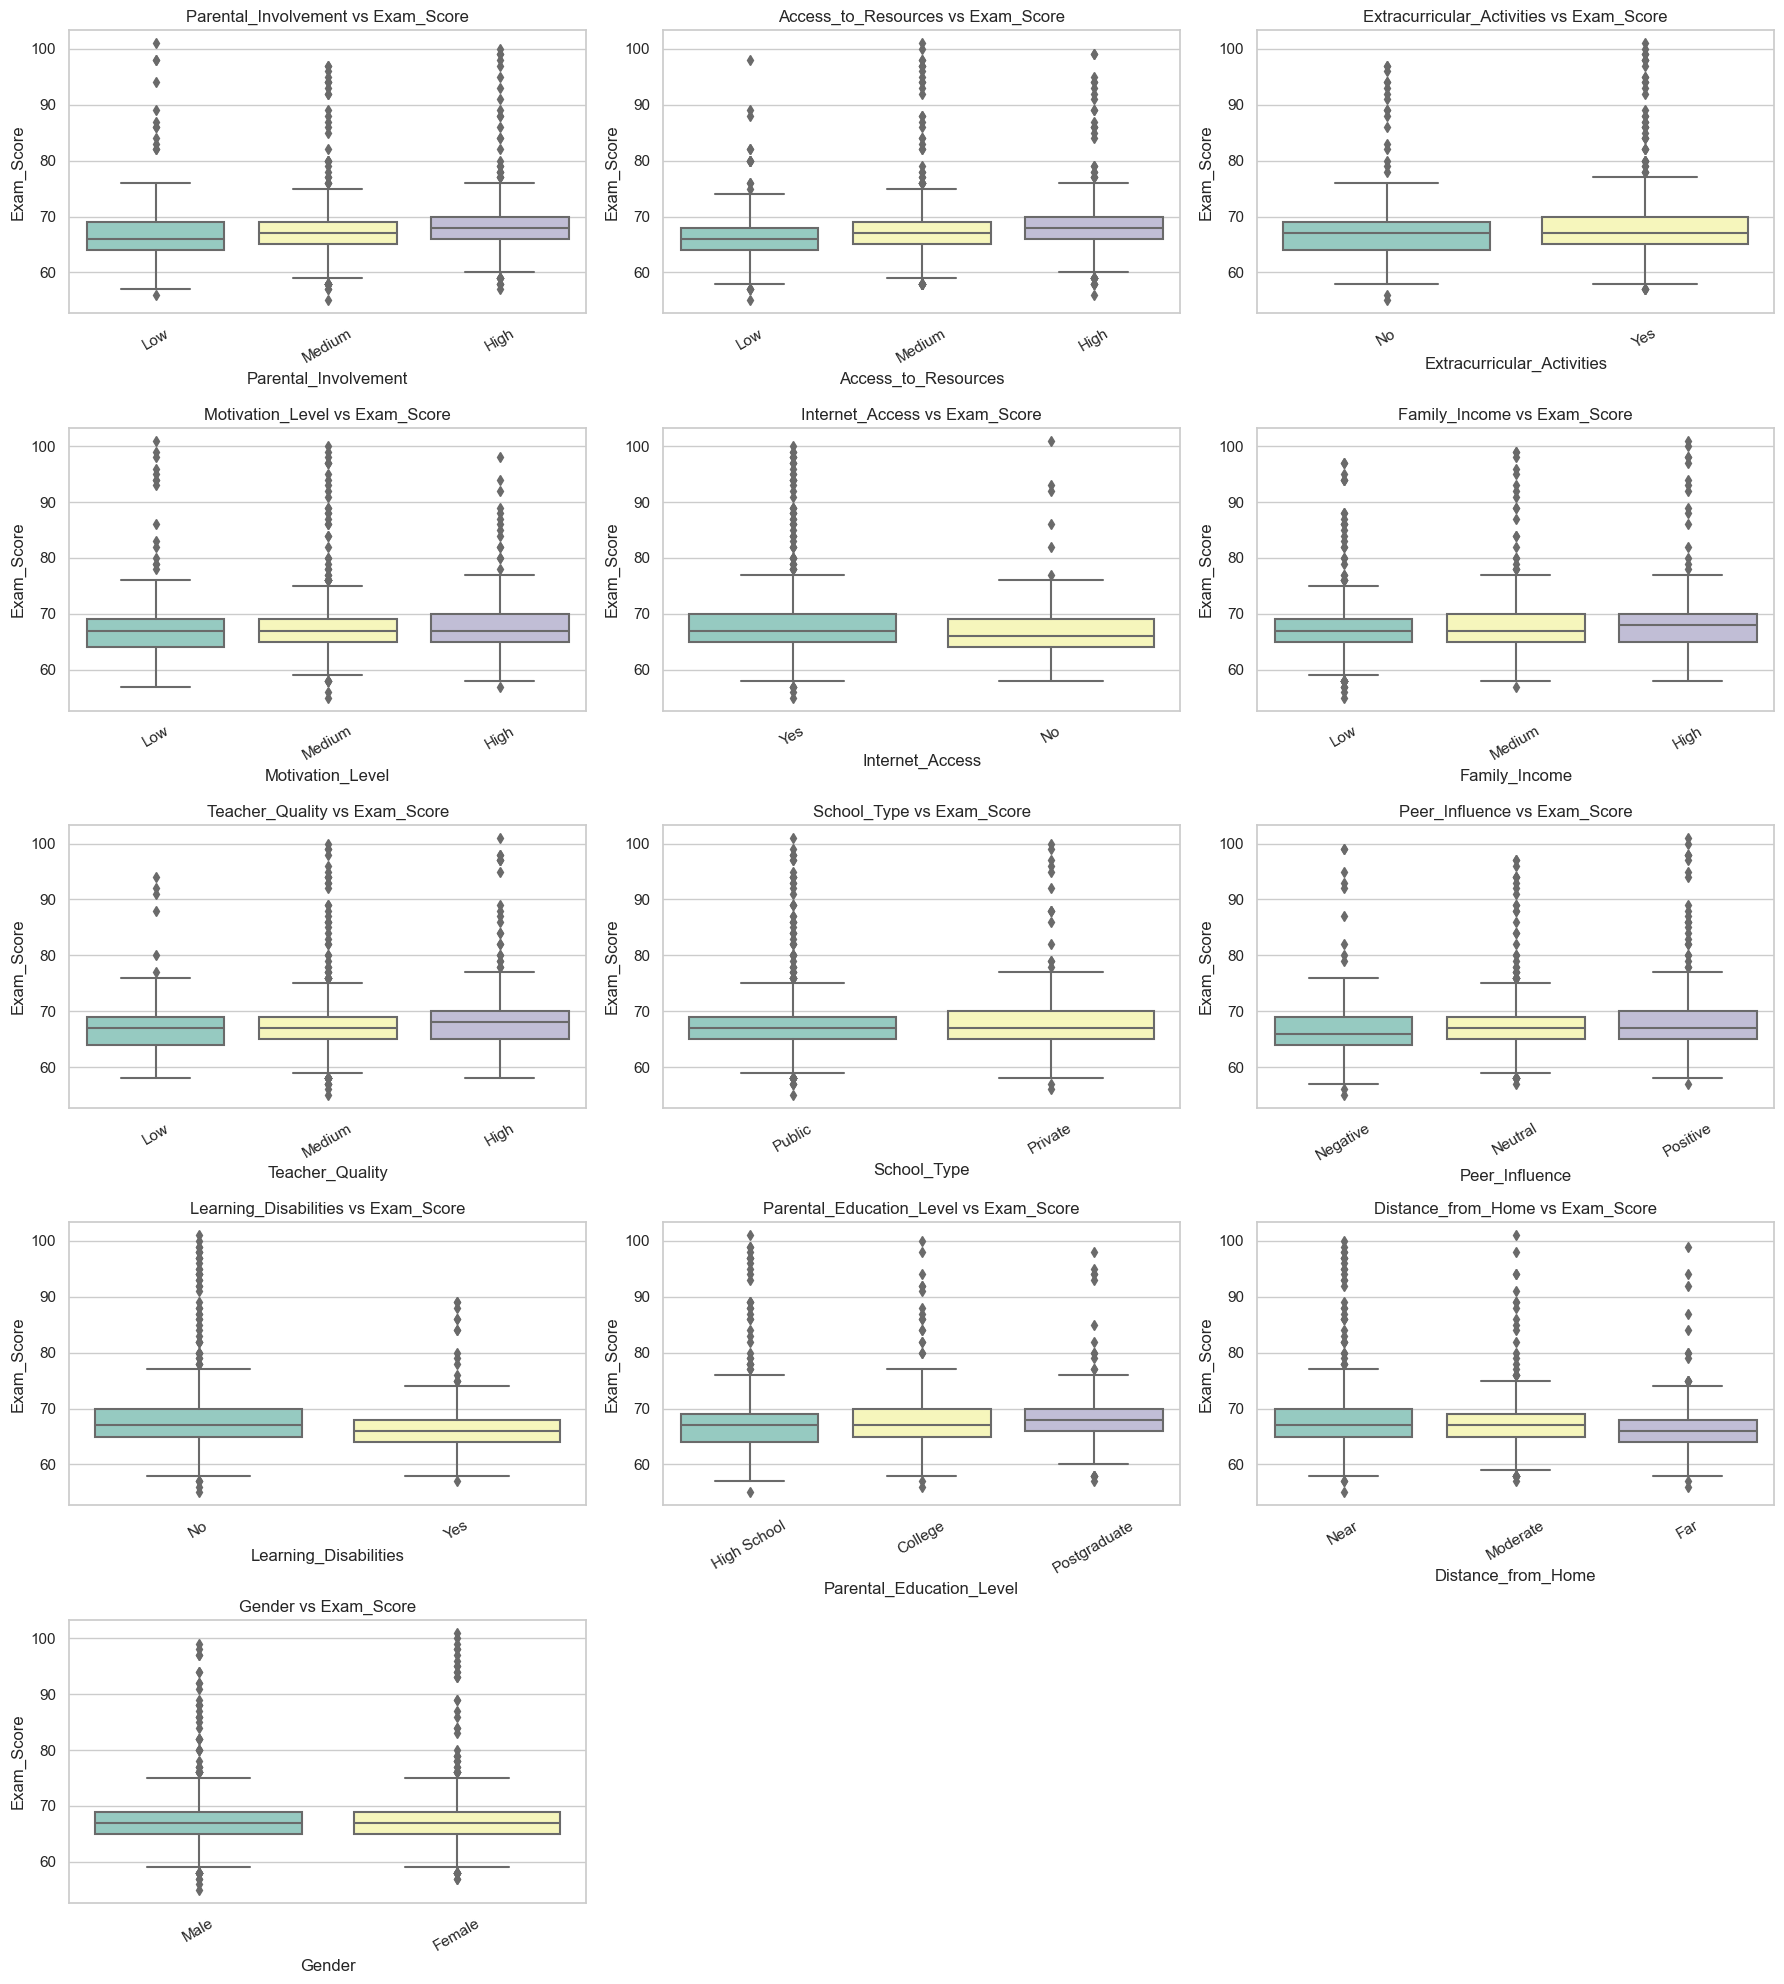

In [42]:
# Define the order for ordinal variables
ordinal_orders = {
    "Parental_Involvement": ["Low", "Medium", "High"],
    "Access_to_Resources": ["Low", "Medium", "High"],
    "Motivation_Level": ["Low", "Medium", "High"],
    "Family_Income": ["Low", "Medium", "High"],
    "Teacher_Quality": ["Low", "Medium", "High"],
    "Peer_Influence": ["Negative", "Neutral", "Positive"],
    "Parental_Education_Level": ["High School", "College", "Postgraduate"],
    "Distance_from_Home": ["Near", "Moderate", "Far"]
}

# List of categorical variables
categorical_vars = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]

# Subplot settings
n_cols = 3
n_rows = -(-len(categorical_vars) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Generate boxplots
for i, var in enumerate(categorical_vars):
    order = ordinal_orders.get(var, None)
    sns.boxplot(x=var, y="Exam_Score", data=df, ax=axes[i], order=order, palette="Set3")
    axes[i].set_title(f"{var} vs Exam_Score")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Exam_Score")
    axes[i].tick_params(axis='x', rotation=30)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

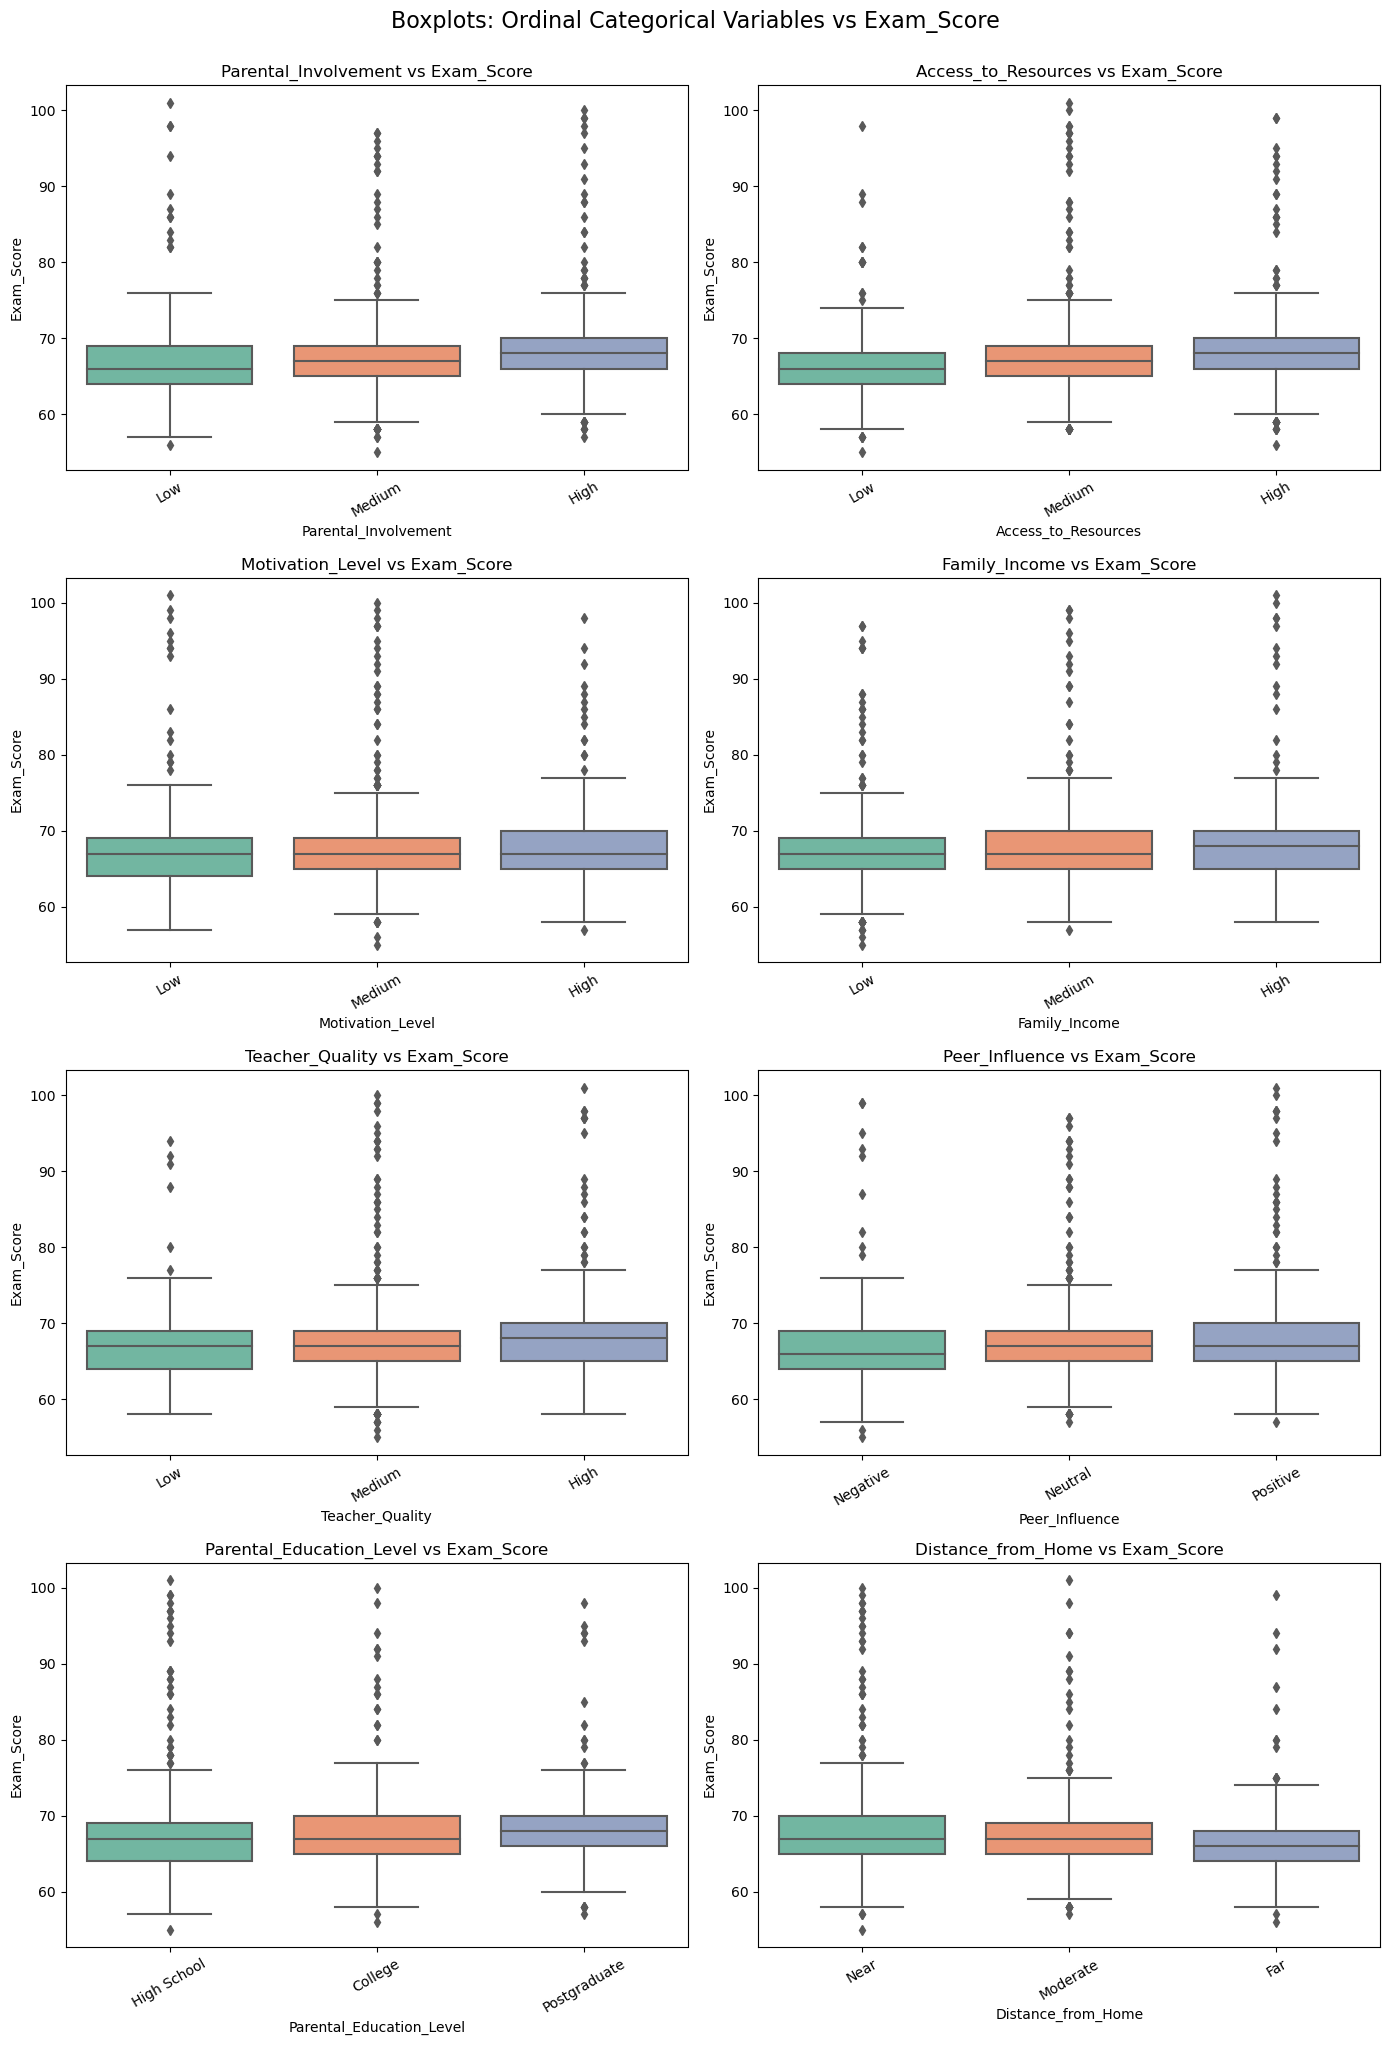

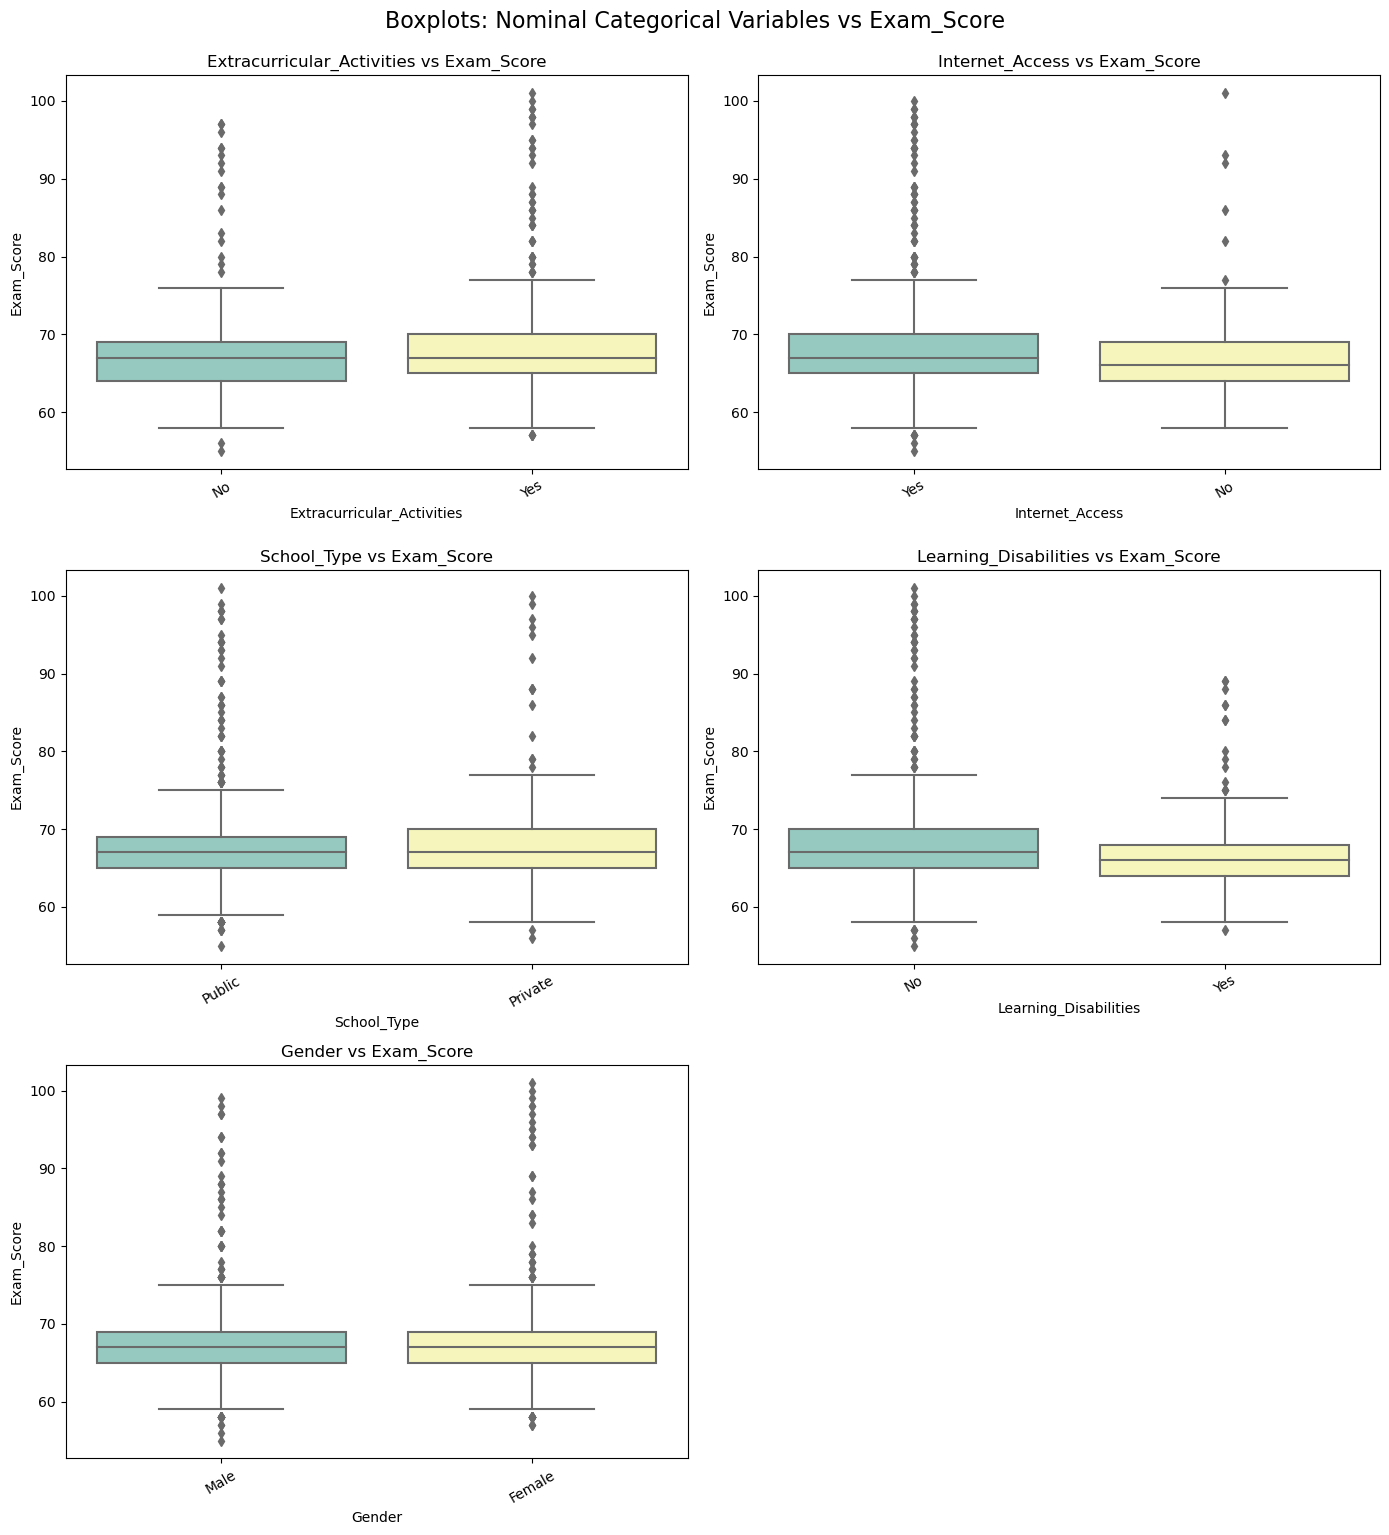

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define order for ordinal variables
ordinal_orders = {
    "Parental_Involvement": ["Low", "Medium", "High"],
    "Access_to_Resources": ["Low", "Medium", "High"],
    "Motivation_Level": ["Low", "Medium", "High"],
    "Family_Income": ["Low", "Medium", "High"],
    "Teacher_Quality": ["Low", "Medium", "High"],
    "Peer_Influence": ["Negative", "Neutral", "Positive"],
    "Parental_Education_Level": ["High School", "College", "Postgraduate"],
    "Distance_from_Home": ["Near", "Moderate", "Far"]
}

# Separate variables
ordinal_vars = list(ordinal_orders.keys())
nominal_vars = [
    "Extracurricular_Activities", "Internet_Access", "School_Type",
    "Learning_Disabilities", "Gender"
]

# ----------- ORDINAL VARIABLES -----------
n_cols = 2
n_rows = -(-len(ordinal_vars) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(ordinal_vars):
    sns.boxplot(x=var, y="Exam_Score", data=df, ax=axes[i],
                order=ordinal_orders[var], palette="Set2")
    axes[i].set_title(f"{var} vs Exam_Score")
    axes[i].tick_params(axis='x', rotation=30)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots: Ordinal Categorical Variables vs Exam_Score", fontsize=16, y=1.02)
plt.show()

# ----------- NOMINAL VARIABLES -----------
n_cols = 2
n_rows = -(-len(nominal_vars) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(nominal_vars):
    sns.boxplot(x=var, y="Exam_Score", data=df, ax=axes[i], palette="Set3")
    axes[i].set_title(f"{var} vs Exam_Score")
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots: Nominal Categorical Variables vs Exam_Score", fontsize=16, y=1.02)
plt.show()


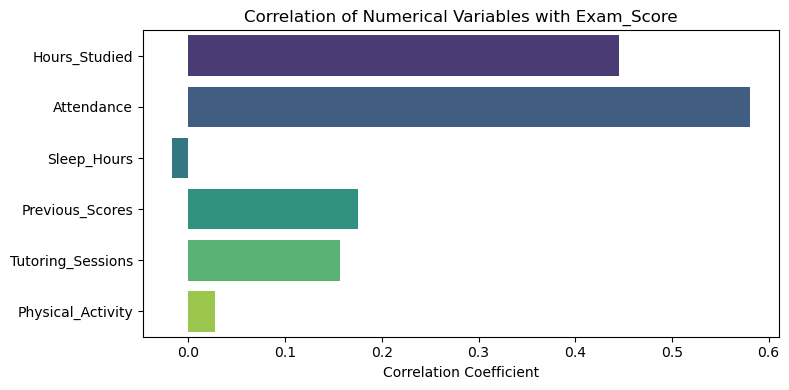

Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Exam_Score'])
correlations = numerical_vars.corrwith(df['Exam_Score'])

# Plot correlations
plt.figure(figsize=(8, 4))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title("Correlation of Numerical Variables with Exam_Score")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

# Print correlations
print(correlations.sort_values(ascending=False))


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

categorical_vars = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]

anova_results = {}

for var in categorical_vars:
    model = ols(f'Exam_Score ~ C({var})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table["PR(>F)"][0]
    anova_results[var] = p_value

# Display sorted results
anova_sorted = dict(sorted(anova_results.items(), key=lambda item: item[1]))
for var, p in anova_sorted.items():
    print(f"{var}: p-value = {p:.4f}")


Access_to_Resources: p-value = 0.0000
Parental_Involvement: p-value = 0.0000
Parental_Education_Level: p-value = 0.0000
Peer_Influence: p-value = 0.0000
Family_Income: p-value = 0.0000
Distance_from_Home: p-value = 0.0000
Learning_Disabilities: p-value = 0.0000
Motivation_Level: p-value = 0.0000
Teacher_Quality: p-value = 0.0000
Extracurricular_Activities: p-value = 0.0000
Internet_Access: p-value = 0.0000
School_Type: p-value = 0.4723
Gender: p-value = 0.8688


In [19]:
# Selected categorical variables
ordinal_vars = [
    "Parental_Involvement", "Motivation_Level", "Teacher_Quality", "Family_Income",
    "Parental_Education_Level", "Access_to_Resources", "Peer_Influence", "Distance_from_Home"
]
nominal_vars = ["Internet_Access", "Extracurricular_Activities", "Learning_Disabilities"]

# Selected numeric variables
numeric_vars = ["Hours_Studied", "Attendance"]

# Target variable
target_var = "Exam_Score"

# Define ordinal mappings for variables with ordered categories
ordinal_mappings = {
    "Parental_Involvement": {"Low": 1, "Medium": 2, "High": 3},
    "Motivation_Level": {"Low": 1, "Medium": 2, "High": 3},
    "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
    "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
    "Parental_Education_Level": {"High School": 1, "College": 2, "Postgraduate": 3},
    "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
    "Peer_Influence": {"Negative": 1, "Neutral": 2, "Positive": 3},
    "Distance_from_Home": {"Far": 1, "Moderate": 2, "Near": 3}
}

# Apply ordinal encoding
for var, mapping in ordinal_mappings.items():
    df[var] = df[var].map(mapping)

# One-hot encode nominal variables
df_nominal_encoded = pd.get_dummies(df[nominal_vars], drop_first=True)

# Combine ordinal, numeric, and encoded nominal features
X = pd.concat([df[ordinal_vars + numeric_vars], df_nominal_encoded], axis=1)

# Define the target variable
y = df[target_var]

# View final feature names
print("Final feature set:\n", X.columns.tolist())



Final feature set:
 ['Parental_Involvement', 'Motivation_Level', 'Teacher_Quality', 'Family_Income', 'Parental_Education_Level', 'Access_to_Resources', 'Peer_Influence', 'Distance_from_Home', 'Hours_Studied', 'Attendance', 'Internet_Access_Yes', 'Extracurricular_Activities_Yes', 'Learning_Disabilities_Yes']


In [20]:
X[X.select_dtypes(include='bool').columns] = X.select_dtypes(include='bool').astype(int)

In [21]:
import pandas as pd
import statsmodels.api as sm

# Convert all columns in X to numeric (if not already)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs (optional, but necessary if coercion created NaNs)
X = X.dropna()
y = y.loc[X.index]  # Match y's index with X

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1020.
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:58:20   Log-Likelihood:                -14709.
No. Observations:                6607   AIC:                         2.945e+04
Df Residuals:                    6593   BIC:                         2.954e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Get predicted values
y_pred = model.predict(X_const)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

RMSE: 2.2419780566791925


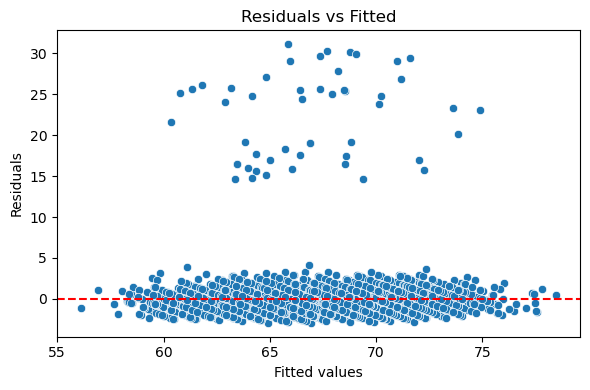

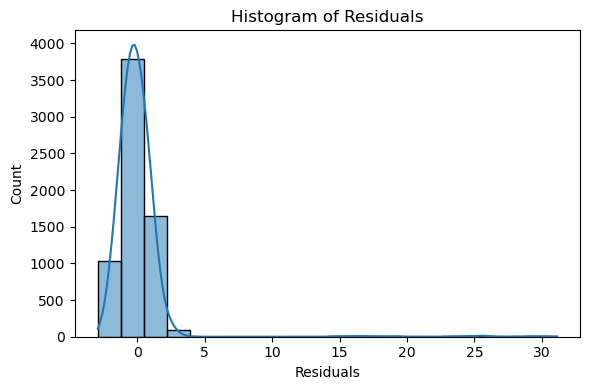

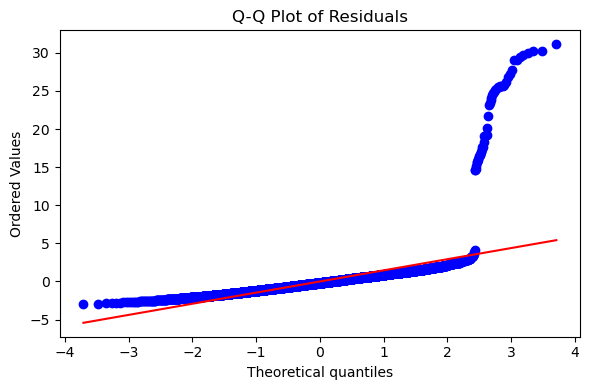

In [28]:
import scipy.stats as stats

# Calculate residuals
residuals = y - y_pred

# Residual vs Fitted plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.savefig(r"C:\Users\Asus\Desktop\4th LEVEL-1st SEM\Is 4007 - Statistics in Practice 2\Project Report\residuals_vs_fitted.png", dpi=300, bbox_inches='tight')
plt.show()

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.savefig(r"C:\Users\Asus\Desktop\4th LEVEL-1st SEM\Is 4007 - Statistics in Practice 2\Project Report\Histogram of Residuals.png", dpi=300, bbox_inches='tight')
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.savefig(r"C:\Users\Asus\Desktop\4th LEVEL-1st SEM\Is 4007 - Statistics in Practice 2\Project Report\QQplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
import pandas as pd
df = pd.read_csv('StudentPerformanceFactors.csv')

# Label Encoding for ordinal variables
ordinal_vars = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}
}

for col, mapping in ordinal_vars.items():
    df[col] = df[col].map(mapping)

# One-Hot Encoding for nominal variables
nominal_vars = ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 
                'Peer_Influence', 'Learning_Disabilities', 'Gender']

df = pd.get_dummies(df, columns=nominal_vars, drop_first=True)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------ Decision Tree ------------------
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R²:", r2_dt)

# ------------------ Random Forest ------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)

Decision Tree RMSE: 3.9828173558127147
Decision Tree R²: -0.15450270924026777

Random Forest RMSE: 2.123103390859405
Random Forest R²: 0.671937596510519


In [31]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 2.146964938349643
XGBoost R²: 0.6645219326019287


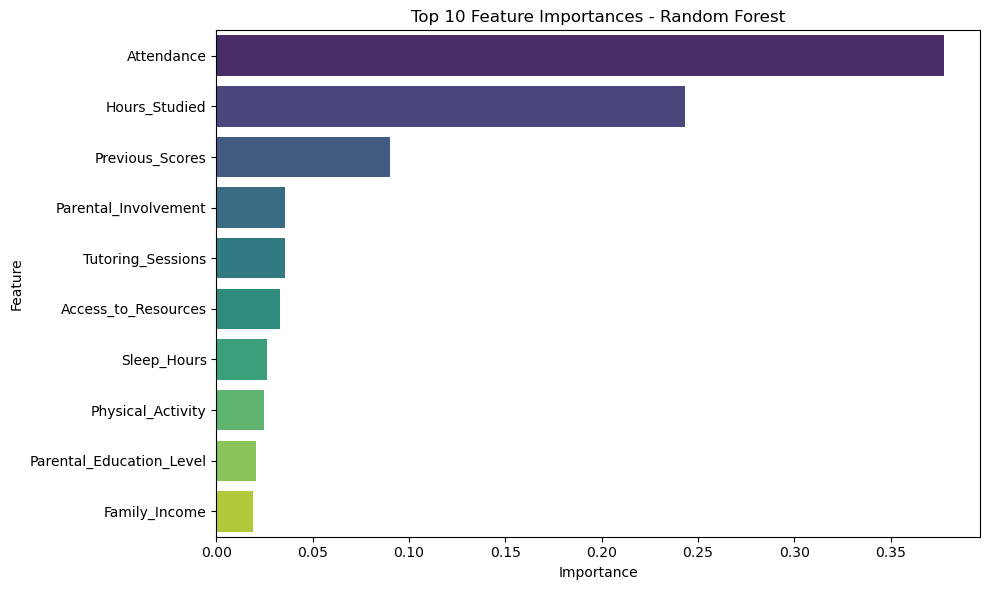

In [33]:
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for better handling
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()

# Save the plot
plt.savefig(r'C:\Users\Asus\Desktop\4th LEVEL-1st SEM\Is 4007 - Statistics in Practice 2\Project Report\feature_importance_rf.png', dpi=300)
plt.show()
